In [1]:
import os
os.environ["KERAS_BACKEND"] = "jax"
import jax
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import boston_housing

In [2]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [7]:
t_mean = train_data.mean(axis=0)
t_std = train_data.std(axis=0)
mean_shifted = train_data - t_mean
train_normalized = mean_shifted / t_std
test_normalized = (test_data - t_mean) / t_std

In [8]:
def build_model():
    model = keras.models.Sequential([
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

mdl = build_model()

Platform 'METAL' is experimental and not all JAX functionality may be correctly supported!
W0000 00:00:1732649192.555047 37077743 mps_client.cc:510] WARNING: JAX Apple GPU support is experimental and not all JAX functionality is correctly supported!
I0000 00:00:1732649192.566287 37077743 service.cc:145] XLA service 0x600001340500 initialized for platform METAL (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732649192.566304 37077743 service.cc:153]   StreamExecutor device (0): Metal, <undefined>
I0000 00:00:1732649192.569264 37077743 mps_client.cc:406] Using Simple allocator.
I0000 00:00:1732649192.569282 37077743 mps_client.cc:384] XLA backend will use up to 28989243392 bytes on device 0 for SimpleAllocator.


Metal device set to: Apple M3 Pro


In [10]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"PROCESSING FOLD: #{i}")
    val_data = train_normalized[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples: (i+1) * num_val_samples]
    partial_x = np.concatenate(
        [train_normalized[:i * num_val_samples],
        train_normalized[(i+1) * num_val_samples:]]
    )
    partial_y = np.concatenate(
        [train_labels[:i * num_val_samples],
        train_labels[(i+1) * num_val_samples:]]
    )
    model = build_model()
    model.fit(partial_x, partial_y, epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

PROCESSING FOLD: #0


/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[13,64]), ShapedArray(float32[64]), ShapedArray(float32[64,64]), ShapedArray(float32[64]), ShapedArray(float32[64,1]), ShapedArray(float32[1]), ShapedArray(int32[]), ShapedArray(float32[]), ShapedArray(float32[13,64]), ShapedArray(float32[64]), ShapedArray(float32[64,64]), ShapedArray(float32[64]), ShapedArray(float32[64,1]), ShapedArray(float32[1]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]).
Donation is not implemented for ('METAL',).
See an explanation at https://jax.readthedocs.io/en/latest/faq.html#buffer-donation.
  warnings.warn("Some donated buffers were not usable:"
/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[13,64])

PROCESSING FOLD: #1


/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[13,64]), ShapedArray(float32[64]), ShapedArray(float32[64,64]), ShapedArray(float32[64]), ShapedArray(float32[64,1]), ShapedArray(float32[1]), ShapedArray(int32[]), ShapedArray(float32[]), ShapedArray(float32[13,64]), ShapedArray(float32[64]), ShapedArray(float32[64,64]), ShapedArray(float32[64]), ShapedArray(float32[64,1]), ShapedArray(float32[1]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]).
Donation is not implemented for ('METAL',).
See an explanation at https://jax.readthedocs.io/en/latest/faq.html#buffer-donation.
  warnings.warn("Some donated buffers were not usable:"
/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[13,64])

PROCESSING FOLD: #2


/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[13,64]), ShapedArray(float32[64]), ShapedArray(float32[64,64]), ShapedArray(float32[64]), ShapedArray(float32[64,1]), ShapedArray(float32[1]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]).
Donation is not implemented for ('METAL',).
See an explanation at https://jax.readthedocs.io/en/latest/faq.html#buffer-donation.
  warnings.warn("Some donated buffers were not usable:"
/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[13,64]), ShapedArray(float32[64]), ShapedArray(float32[64,64]), ShapedArray(float32[64]), ShapedArray(float32[64,1]), ShapedArray(float32[1]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), S

PROCESSING FOLD: #3


/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[13,64]), ShapedArray(float32[64]), ShapedArray(float32[64,64]), ShapedArray(float32[64]), ShapedArray(float32[64,1]), ShapedArray(float32[1]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]).
Donation is not implemented for ('METAL',).
See an explanation at https://jax.readthedocs.io/en/latest/faq.html#buffer-donation.
  warnings.warn("Some donated buffers were not usable:"
/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[13,64]), ShapedArray(float32[64]), ShapedArray(float32[64,64]), ShapedArray(float32[64]), ShapedArray(float32[64,1]), ShapedArray(float32[1]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), S

In [11]:
all_scores

[2.1412265300750732, 2.383836030960083, 2.556122064590454, 2.4299890995025635]

In [14]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"PROCESSING FOLD: #{i}")
    val_data = train_normalized[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples: (i+1) * num_val_samples]
    partial_x = np.concatenate(
        [train_normalized[:i * num_val_samples],
        train_normalized[(i+1) * num_val_samples:]]
    )
    partial_y = np.concatenate(
        [train_labels[:i * num_val_samples],
        train_labels[(i+1) * num_val_samples:]]
    )
    model = build_model()
    history = model.fit(partial_x, partial_y, epochs=num_epochs, batch_size=16, 
                        verbose=0, validation_data=(val_data, val_targets))
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)
    
    

PROCESSING FOLD: #0


/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[13,64]), ShapedArray(float32[64]), ShapedArray(float32[64,64]), ShapedArray(float32[64]), ShapedArray(float32[64,1]), ShapedArray(float32[1]), ShapedArray(int32[]), ShapedArray(float32[]), ShapedArray(float32[13,64]), ShapedArray(float32[64]), ShapedArray(float32[64,64]), ShapedArray(float32[64]), ShapedArray(float32[64,1]), ShapedArray(float32[1]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]).
Donation is not implemented for ('METAL',).
See an explanation at https://jax.readthedocs.io/en/latest/faq.html#buffer-donation.
  warnings.warn("Some donated buffers were not usable:"
/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[13,64])

PROCESSING FOLD: #1


/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[13,64]), ShapedArray(float32[64]), ShapedArray(float32[64,64]), ShapedArray(float32[64]), ShapedArray(float32[64,1]), ShapedArray(float32[1]), ShapedArray(int32[]), ShapedArray(float32[]), ShapedArray(float32[13,64]), ShapedArray(float32[64]), ShapedArray(float32[64,64]), ShapedArray(float32[64]), ShapedArray(float32[64,1]), ShapedArray(float32[1]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]).
Donation is not implemented for ('METAL',).
See an explanation at https://jax.readthedocs.io/en/latest/faq.html#buffer-donation.
  warnings.warn("Some donated buffers were not usable:"
/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[13,64])

PROCESSING FOLD: #2


/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[13,64]), ShapedArray(float32[64]), ShapedArray(float32[64,64]), ShapedArray(float32[64]), ShapedArray(float32[64,1]), ShapedArray(float32[1]), ShapedArray(int32[]), ShapedArray(float32[]), ShapedArray(float32[13,64]), ShapedArray(float32[64]), ShapedArray(float32[64,64]), ShapedArray(float32[64]), ShapedArray(float32[64,1]), ShapedArray(float32[1]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]).
Donation is not implemented for ('METAL',).
See an explanation at https://jax.readthedocs.io/en/latest/faq.html#buffer-donation.
  warnings.warn("Some donated buffers were not usable:"
/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[13,64])

PROCESSING FOLD: #3


/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[13,64]), ShapedArray(float32[64]), ShapedArray(float32[64,64]), ShapedArray(float32[64]), ShapedArray(float32[64,1]), ShapedArray(float32[1]), ShapedArray(int32[]), ShapedArray(float32[]), ShapedArray(float32[13,64]), ShapedArray(float32[64]), ShapedArray(float32[64,64]), ShapedArray(float32[64]), ShapedArray(float32[64,1]), ShapedArray(float32[1]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]).
Donation is not implemented for ('METAL',).
See an explanation at https://jax.readthedocs.io/en/latest/faq.html#buffer-donation.
  warnings.warn("Some donated buffers were not usable:"
/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[13,64])

In [22]:
mh = np.asarray(all_mae_histories)
mae_means = mh.mean(axis=0)
mae_means.shape

(500,)

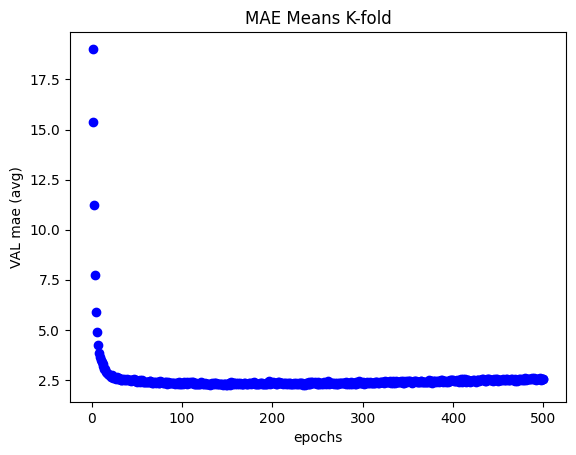

In [23]:
epochs = range(1, 501)
plt.plot(epochs, mae_means, "bo", label="mae_mean")
plt.title("MAE Means K-fold")
plt.xlabel("epochs")
plt.ylabel("VAL mae (avg)")
plt.show()

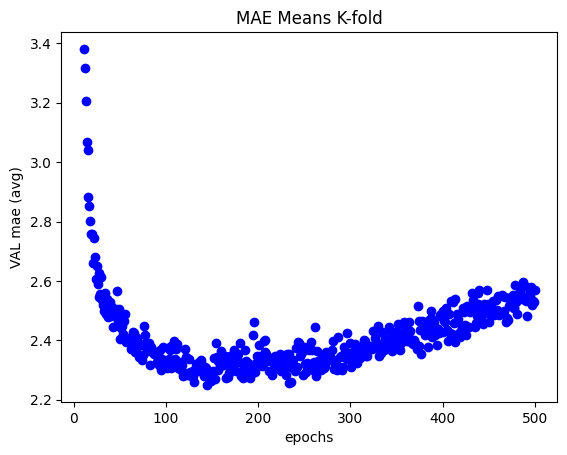

In [24]:
better_scale = mae_means[10:]
better_scale_e = epochs[10:]
plt.plot(better_scale_e, better_scale, "bo", label="mae_mean")
plt.title("MAE Means K-fold")
plt.xlabel("epochs")
plt.ylabel("VAL mae (avg)")
plt.show()

In [36]:
final = build_model()
final.fit(train_normalized, train_labels, epochs=100, batch_size=16, verbose=0)

test_mse_score, test_mae_score = final.evaluate(test_normalized, test_labels)

/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[13,64]), ShapedArray(float32[64]), ShapedArray(float32[64,64]), ShapedArray(float32[64]), ShapedArray(float32[64,1]), ShapedArray(float32[1]), ShapedArray(int32[]), ShapedArray(float32[]), ShapedArray(float32[13,64]), ShapedArray(float32[64]), ShapedArray(float32[64,64]), ShapedArray(float32[64]), ShapedArray(float32[64,1]), ShapedArray(float32[1]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]).
Donation is not implemented for ('METAL',).
See an explanation at https://jax.readthedocs.io/en/latest/faq.html#buffer-donation.
  warnings.warn("Some donated buffers were not usable:"
/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[13,64])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13.2755 - mae: 2.4185


/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[13,64]), ShapedArray(float32[64]), ShapedArray(float32[64,64]), ShapedArray(float32[64]), ShapedArray(float32[64,1]), ShapedArray(float32[1]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]).
Donation is not implemented for ('METAL',).
See an explanation at https://jax.readthedocs.io/en/latest/faq.html#buffer-donation.
  warnings.warn("Some donated buffers were not usable:"
/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[13,64]), ShapedArray(float32[64]), ShapedArray(float32[64,64]), ShapedArray(float32[64]), ShapedArray(float32[64,1]), ShapedArray(float32[1]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), S

In [37]:
test_mse_score

19.097021102905273

In [38]:
test_mae_score

2.650057554244995